In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import numpy as np

In [13]:
import sklearn
sklearn.__version__

'0.19.1'

In [40]:
from sklearn.pipeline import make_pipeline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.learning_curve import validation_curve
from sklearn.preprocessing import PolynomialFeatures

def make_data(N, err=0.1, rseed=1):
    rng = np.random.RandomState(1)
    x = 10 * rng.rand(N)
    X = x[:, None]
    y = np.sin(x)
    if err > 0:
        y += err * rng.randn(N)
    return X, y

def PolynomialRegression(degree=4):
    return make_pipeline(PolynomialFeatures(degree),
                         LinearRegression())

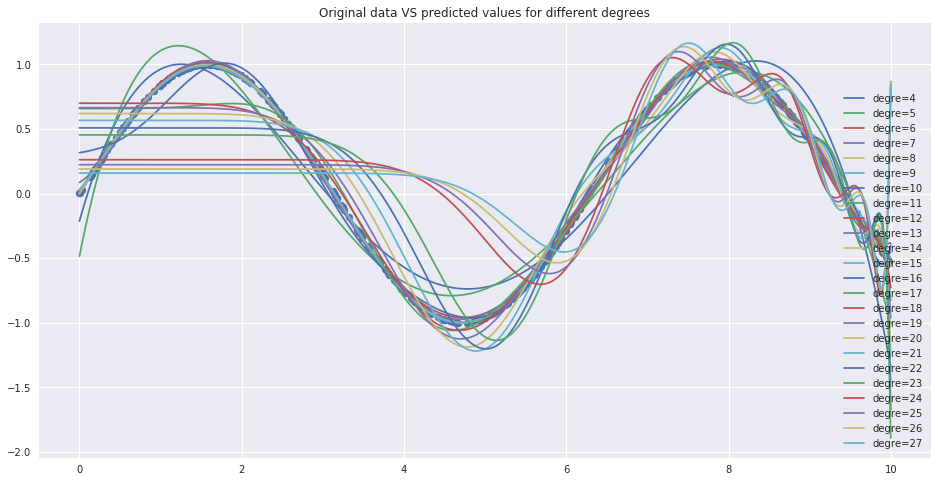

In [46]:
X, y = make_data(400, err=0)

X_test = np.linspace(0, 10, 500)[:, None]
degrees = np.arange(4, 28)

plt.figure(figsize=(16, 8))
plt.scatter(X.flatten(), y)
for degree in degrees:
    y_test = PolynomialRegression(degree).fit(X, y).predict(X_test)
    plt.plot(X_test, y_test, label='degre={0}'.format(degree))
plt.title('Original data VS predicted values for different degrees')
plt.legend(loc='best');

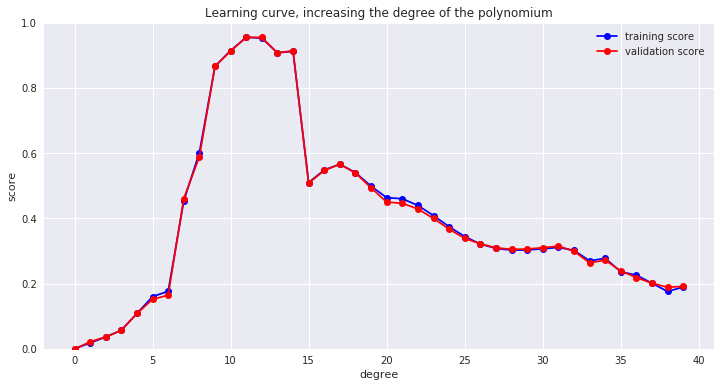

In [23]:
degree = np.arange(0, 40)

train_score, val_score = validation_curve(PolynomialRegression(), X, y,
                                                 'polynomialfeatures__degree',
                                                 degree, cv=7)

plt.figure(figsize=(12, 6))
plt.plot(degree, np.median(train_score, 1), marker='o', 
         color='blue', label='training score')
plt.plot(degree, np.median(val_score, 1), marker='o',
         color='red', label='validation score')
plt.legend(loc='best')
plt.ylim(0, 1)
plt.title('Learning curve, increasing the degree of the polynomium')
plt.xlabel('degree')
plt.ylabel('score');